# Исследование объявлений о продаже квартир

### Открытие и изучение информации 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


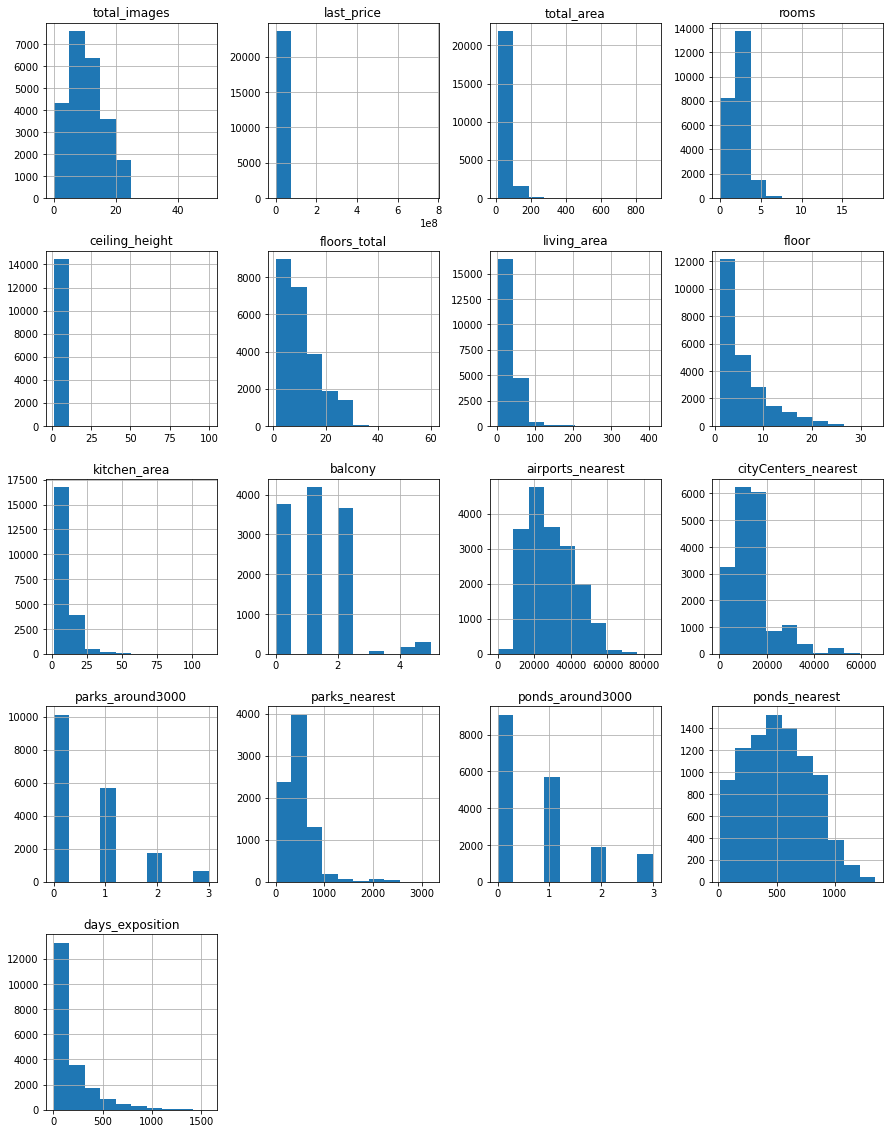

In [2]:
try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data.info()
display(data.head(10))
data.hist(figsize=(15, 20));

пропуски есть в: высоте потолков, этажей всего, жилая площадь, аппартаменты, площадь кухни, балконы, название населённого пункта, ближайший аэропорт, расстояние до центра города, парки вокруг, расстояние до ближ парка, водоемы вокруг, расстояние до ближ водоема, дни размещения объявления.
Итого 14 позиций. Столбцы: Аппартаменты, балконы, парки вокруг, водоемы вокруг - значении можно поставить 0, тк если не указали, с большей долей вероятности их нет.
Судя по гистограммам в первом грубом приближении мы видим, что в нашем датасете объявлений о квартирах имеют:
1. фото в количестве от 0 до 25 шт. в среднем 7-8. тип int64
2. площадь до 300 кв м. В большинтсве до 100 кв м тип float64
3. по ценам нужно изучать детальнее. тип float64
4. кол-во комнат до 7-8. В среднем 2-3. тип int64
5. высота потолка до 10 метров.надо изучать. тип float64
6. этажность до 38. В среднем до 5. тип float64
7. Жэилая площадть до 200 м. В среднем до 50. тип float64
8. этаж до 28. В среднем до 5. тип int64
9. площадь кухни до 60 м. В среднем до 10. тип float64
10. балконы до 5. в среднем 1. тип float64
11. аэропорт до 80 км. В срднем 20км. тип float64
12. центр города до 60 км. В среднем 10. тип float64
13. до 3 парков вокруг. в среднем 0. тип float64
14. до 2,5 км ближайший парк. В среднем 0,5 км. тип float64
15. водоемов до 3. В среднем 0. тип float64
16. до водоема до 1,4 км. в среднем 0,5км. тип float64
17. объявления рамзещались до 4 лет. в среднем до 1 года . тип float64


In [3]:
# check
# пропущенные значения бары

def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind = 'barh', figsize = (19,6), rot = -5, legend = False, fontsize = 16)
            .set_title('Пример' + "\n", fontsize = 22, color = 'SteelBlue')    
        );    
    except:
        print('пропусков не осталось :) или произошла ошибка в первой части функции ')

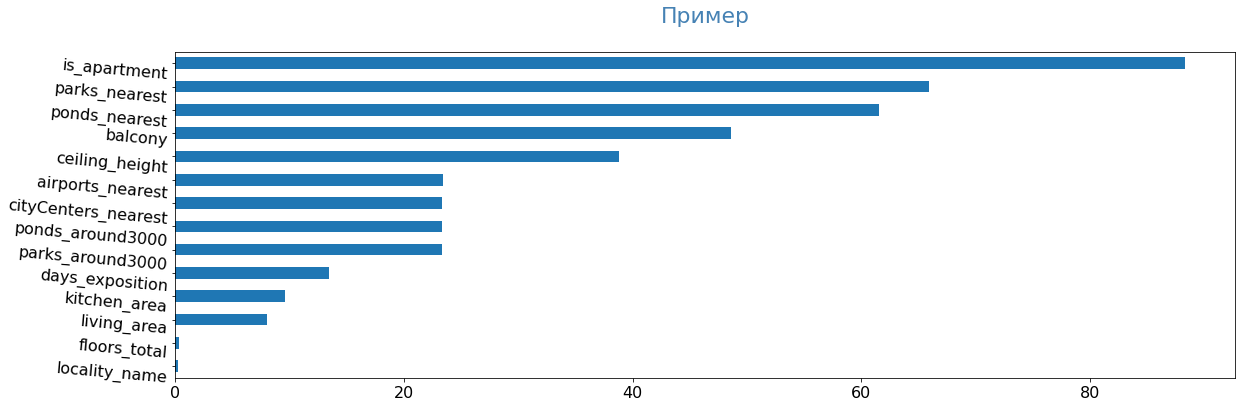

In [4]:
pass_value_barh(data)

### Предобработка данных

In [5]:
data.duplicated().value_counts()

False    23699
dtype: int64

явных дубликатов нет

In [6]:
data['is_apartment'] = data['is_apartment'].fillna(False).astype(bool)

заменяем пустые значение в столбце аппартаментов на False и меняем тип на bool. Если не указали вероятнее всего это жилое помещение. А так же меняем тип на float этаж, чтобы привести все столбцы с этажами к единому типу.

In [7]:
data['balcony'] = data['balcony'].fillna(0).astype(int)
data['parks_around3000'] = data['parks_around3000'].fillna(0)

Столбцы: Балконы, парки вокруг, водоемы вокруг - значении можно поставить 0, тк если не указали, с большей долей вероятности их нет.

In [8]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

Переводим столбец с датой в тип datetime для удобства дальнейшей работы

In [9]:
for i in data:
    print(i, data[i].sort_values().unique())
    print()

total_images [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 35 37 39 42 50]

last_price [1.219e+04 4.300e+05 4.400e+05 ... 4.013e+08 4.200e+08 7.630e+08]

total_area [ 12.   13.   13.2 ... 631.  631.2 900. ]

first_day_exposition ['2014-11-27T00:00:00.000000000' '2014-11-29T00:00:00.000000000'
 '2014-12-04T00:00:00.000000000' ... '2019-05-01T00:00:00.000000000'
 '2019-05-02T00:00:00.000000000' '2019-05-03T00:00:00.000000000']

rooms [ 0  1  2  3  4  5  6  7  8  9 10 11 12 14 15 16 19]

ceiling_height [  1.     1.2    1.75   2.     2.2    2.25   2.3    2.34   2.4    2.45
   2.46   2.47   2.48   2.49   2.5    2.51   2.52   2.53   2.54   2.55
   2.56   2.57   2.58   2.59   2.6    2.61   2.62   2.63   2.64   2.65
   2.66   2.67   2.68   2.69   2.7    2.71   2.72   2.73   2.74   2.75
   2.76   2.77   2.78   2.79   2.8    2.81   2.82   2.83   2.84   2.85
   2.86   2.87   2.88   2.89   2.9    2.91   2.92   2.93   2.94   2.95
   2.96   2.97

Изучив отсортированные уникальные значения датасета мы видим:
1. цены - первая цена 1.219e+04 вызывает подозрение, что за нее что-то можно приобрести. Думаю это ошибка и строчку стоит убрать.
2. высота потолка - все что менее двух метров, Так же не понятна высота потолков от 10 до 20 метров - видимо ошибка. Убираем данные значения. Все что больше 20 - стоит разделить на 10. Пустых значений очень много - без малого 10 тыс. принимаем решение их оставить.
3. всего этажей - убираем строки с пропусками - их небольшое кол-во от общего и не навредит исследованию.
4. жилая площадь меньше 5 тоже вызывает подозрение. убираем из рассмотрения. И так же убираем пропуски
5. площадь кухни - убираем пропуски, их не большое кол-во.
6. Населенный пункт - необходимо проверить на неявные дубликаты и убрать пропущенные значения.
7. Количество комнат не может быть равно 0. Убираем из рассмотрения 

Остальные пропуски оставляем без изменений. 

Причиной пропусков в высоте потолков, этажей всего, жилая площадь, аппартаменты, площадь кухни, балконы - может быть как человеческий фактор(не внесли), так и ошибка выгрузки.
В то время как название населённого пункта, ближайший аэропорт, расстояние до центра города, парки вокруг, расстояние до ближ парка, водоемы вокруг, расстояние до ближ водоема, дни размещения объявления - вероятнее всего это техническая ошибка выгрузки, тк все вышеперечисленные данные просчитываются системой.

In [10]:
data = data.dropna(subset=['floors_total', 'locality_name'])
data['floors_total'] = data['floors_total'].astype(int)

In [11]:
# check
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  float64       
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        14481 non-null  float64       
 6   floors_total          23565 non-null  int64         
 7   living_area           21700 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          21343 non-null  float64       
 13  balcony         

In [12]:
data = data[(data['last_price']>13000)]
data = data[(data['rooms']>0)]
data = data[(data['living_area']>=5)]
data['ceiling_height'] = data['ceiling_height'].apply(lambda x: x/10 if x>=20 else x)
index_names = data[(data['ceiling_height']<2) | (data['ceiling_height']>10)].index
data.drop(index_names, inplace = True)
# data['locality_name'] = data['locality_name'].str.replace('ё','е')
# data['locality_name'] = data['locality_name'].str.replace('поселок городского типа','поселок')
# data['locality_name'] = data['locality_name'].str.replace('городской поселок','поселок')
# data['locality_name'] = data['locality_name'].str.replace('коттеджный поселок','поселок')

In [13]:
# check
data.shape[0]

21508

In [14]:

data['locality_name'] = data['locality_name'].str.replace('ё','е')
data['locality_name'] = data['locality_name'].str.replace('поселок городского типа','поселок')
data['locality_name'] = data['locality_name'].str.replace('городской поселок','поселок')
data['locality_name'] = data['locality_name'].str.replace('коттеджный поселок','поселок')

Сделали предобоаботку данных согласно пунткам описанным выше. Осталось к изучению 21169 строк (примерно 90% от исходных данных)

In [15]:
# check
data.locality_name.nunique()

304

#### check gap

In [16]:
# check

# Показатели о кол-ве объявлений в датасете, минимальных и максимальных значениях 
# в выбранных параметрах о продаже квартир
# сырые данные

(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area',
          'floor', 'floors_total']]
    .apply (['count', 'min', 'max', 'median'])   
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"21,508.00","21,508.00","13,602.00","18,544.00","21,508.00","21,508.00","20,897.00","21,508.00","21,508.00"
min,1.00,12.00,2.00,1.00,"430,000.00",5.40,1.30,1.00,1.00
max,19.00,900.00,10.00,"1,580.00","763,000,000.00",409.70,112.00,33.00,60.00
median,2.00,52.00,2.65,102.00,"4,675,000.00",30.00,9.00,4.00,9.00


In [17]:
# check

try:
    df_check = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')
# если не получилось прочитать файл из локальной папки, то загружаем данные из сети
except:
    df_check = pd.read_csv('real_estate_data.csv', sep='\t')

In [18]:
# check
df_check.rooms.value_counts().to_frame()

,rooms
1,8047
2,7940
3,5814
4,1180
5,326
0,197
6,105
7,59
8,12
9,8


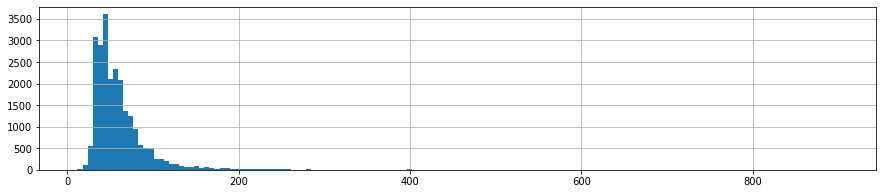

In [19]:
# check
df_check.total_area.hist(bins = 150, figsize = (15,3));

<div class="alert alert-success">
<font size="4", color= "seagreen"><b>✔️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />т.е. все квартиры менее 20-ти и более 250-ти квадратных метров можно считать редкостями
       

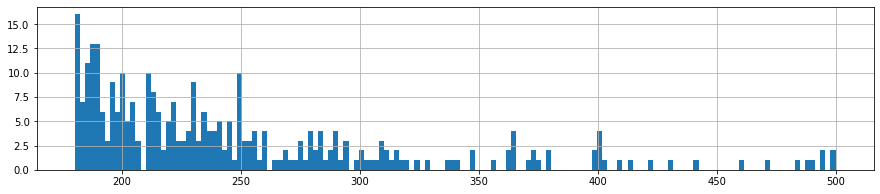

In [20]:
# check
df_check.total_area.hist(bins = 150, figsize = (15,3), range = (180,500));

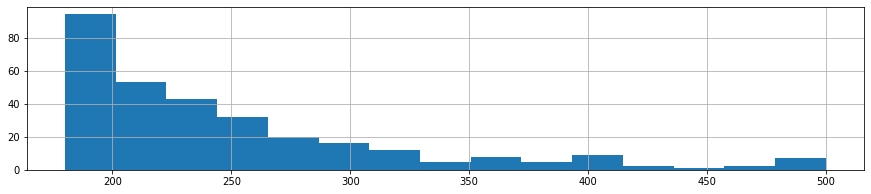

In [21]:
# check
df_check.total_area.hist(bins = 15, figsize = (15,3), range = (180,500));

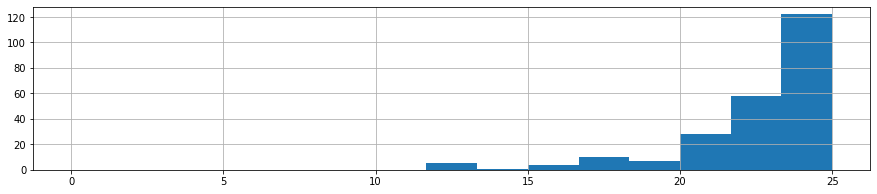

In [22]:
# check
df_check.total_area.hist(bins = 15, figsize = (15,3), range = (0,25));

In [23]:
# check

# Значения параметров объектов недвижимости на разных квантилях

(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  
        'kitchen_area', 'floor',   'floors_total']]
    .quantile([0.0012, 0.01, .5, .99, .9988]) # выбираем размах в 0,9976 квантилей 
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
0.0012,1.00,21.54,2.33,3.00,"600,000.00",10.00,3.80,1.00,2.00
0.01,1.00,28.00,2.50,4.00,"1,050,000.00",13.00,5.00,1.00,2.00
0.5,2.00,52.00,2.65,102.00,"4,675,000.00",30.00,9.00,4.00,9.00
0.99,5.00,192.29,3.75,"1,073.14","35,000,000.00",120.93,35.00,22.00,26.00
0.9988,8.00,364.19,4.50,"1,373.24","124,067,060.00",220.00,59.88,26.00,35.00


  'rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area', 'floors_total'

<AxesSubplot:>

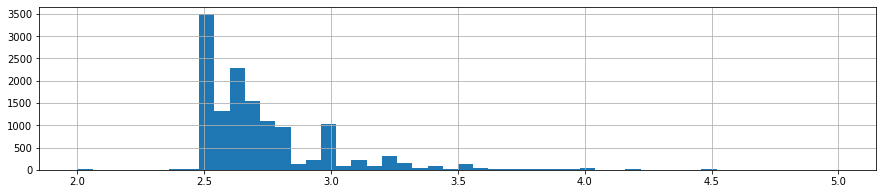

In [24]:
## Убираем не более 1% из каждого столбца - аномальные значения
#изучаем комнаты
data.rooms.value_counts().to_frame()
#убираем все что больше 8 комнат - около 1%
data = data[(data['rooms']<8)]
#убираем все что больше 250 и меньше 20 кв.м. - не более 1%
data = data[(data['total_area']<=250)&(data['total_area']>=20)]
display(data['ceiling_height'].hist(bins = 50, figsize = (15,3), range = (2,5)))
#убираем все что больше 4.5 и меньше 2.33 м - не более 1%
data = data[(data['ceiling_height']>=2.33)&(data['ceiling_height']<=4.5)|(data['ceiling_height'].isna())]

<AxesSubplot:>

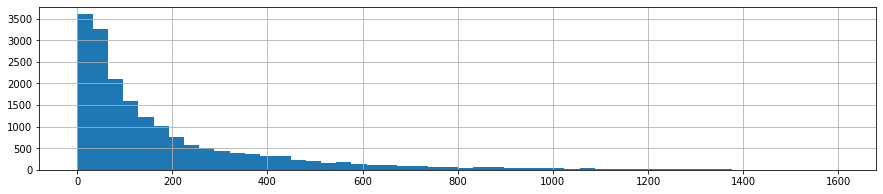

In [25]:
display(data['days_exposition'].hist(bins = 50, figsize = (15,3), range = (1,1600)))

<AxesSubplot:>

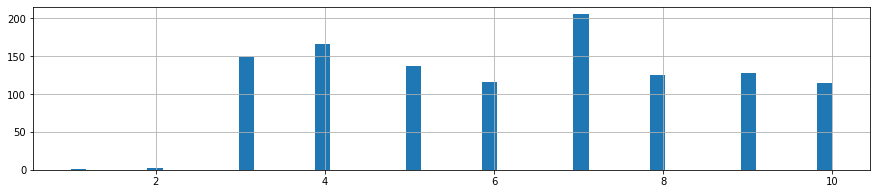

In [26]:
display(data['days_exposition'].hist(bins = 50, figsize = (15,3), range = (1,10)))

<AxesSubplot:>

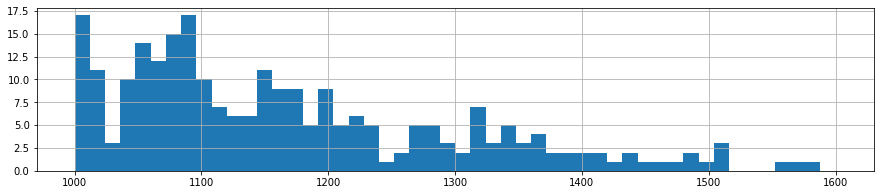

In [27]:
display(data['days_exposition'].hist(bins = 50, figsize = (15,3), range = (1000,1600)))
#убираем значения времени объвяления меньше 3 и больше 1200 дней- менее 1%
data = data[(data['days_exposition']>=3)&(data['days_exposition']<=1200)|(data['days_exposition'].isna())]

In [28]:
# на основании таблицы квантилей выбираем вилку значений цены 600тыс - 124 млн. Остальное убираем - менее 1%
data = data[(data['last_price']>=600000)&(data['last_price']<=124000000)|(data['last_price'].isna())]
# на основании таблицы квантилей выбираем вилку жилой площади 10-220 кв.м. Остальное убираем - менее 1%
data = data[(data['living_area']>=10)&(data['living_area']<=220)|(data['living_area'].isna())]
# на основании таблицы квантилей выбираем вилку кухонной площади 3.8-220 кв.м. Остальное убираем - менее 1%
data = data[(data['kitchen_area']>=3.8)&(data['kitchen_area']<=59.88)|(data['kitchen_area'].isna())]
# на основании таблицы квантилей выбираем вилку этажности зданий 2-35. Остальное убираем - менее 1%
data = data[(data['floors_total']>=2)&(data['floors_total']<=35)|(data['floors_total'].isna())]

### Расчет и добавление новых столбцов

In [29]:
data.reset_index(drop=True)
data['meter_cost'] = data['last_price']/data['total_area']
data['day_start'] = pd.DatetimeIndex(data['first_day_exposition']).weekday
data['month_start'] = pd.DatetimeIndex(data['first_day_exposition']).month
data['year_start'] = pd.DatetimeIndex(data['first_day_exposition']).year       
data['cityCenters_nearest_km']  = (data['cityCenters_nearest']/1000).round()

In [30]:
data['floor_type'] = np.where(data['floors_total']==data['floor'], 'последний', 'другой')
data['floor_type'] = np.where(data['floor']==1, 'первый', data['floor_type'])
data['floor_type'].value_counts()

другой       15602
последний     2989
первый        2578
Name: floor_type, dtype: int64

### Исследовательский анализ данных

count    21169.000000
mean        58.844422
std         27.882822
min         20.000000
25%         40.000000
50%         52.000000
75%         69.000000
max        250.000000
Name: total_area, dtype: float64

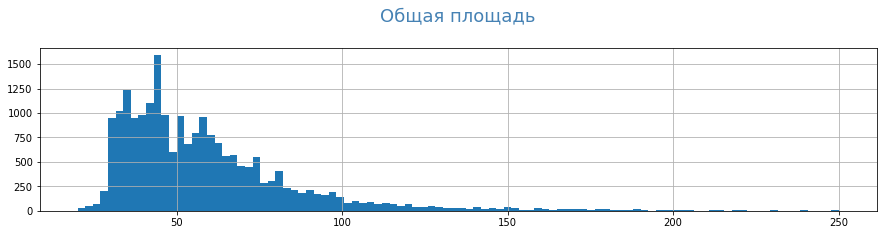

In [31]:
data['total_area'].hist(range=(20,250), figsize = (15,3), bins=100).set_title('Общая площадь' + "\n", fontsize = 18, color = 'SteelBlue');
data['total_area'].describe()

По общей площади - квартиры идут от 20 до 250 кв.м. Наибольшее кол-во объявлений с площадью около 40 кв.м. Похоже на распределение Пуассона. Чем больше площадь тем меньше предложений.

count    21169.000000
mean        33.749581
std         18.486100
min         10.000000
25%         18.700000
50%         30.000000
75%         42.100000
max        200.000000
Name: living_area, dtype: float64

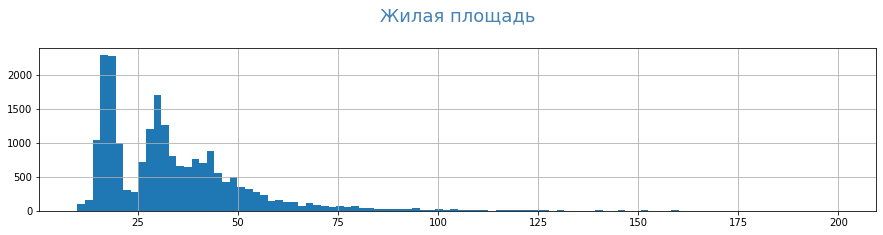

In [32]:
data['living_area'].hist(range=(10, 200), figsize = (15,3), bins=100).set_title('Жилая площадь' + "\n", fontsize = 18, color = 'SteelBlue') 
data['living_area'].describe()

По жилой площади - квартиры идут от 10 до 200 кв.м. Наибольшее кол-во объявлений с площадью 20 и 30 кв.м. Похоже на распределение Пуассона. Чем больше площадь тем меньше предложений.

count    20576.000000
mean        10.337432
std          5.132549
min          3.800000
25%          7.000000
50%          9.000000
75%         11.900000
max         58.400000
Name: kitchen_area, dtype: float64

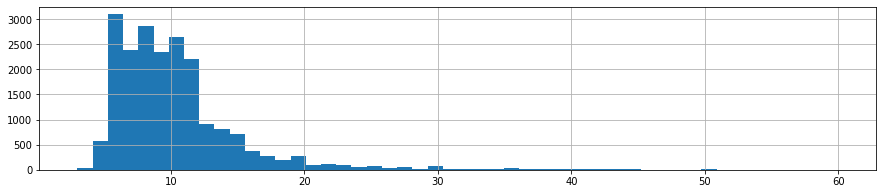

In [33]:
data['kitchen_area'].hist(range=(3, 60), figsize = (15,3), bins=50)
data['kitchen_area'].describe()

По площади кухни - квартиры идут от 3.8 до 68 кв.м. Наибольшее кол-во объявлений с площадью около 7-12 кв.м. 

count    2.116900e+04
mean     6.072706e+06
std      5.606991e+06
min      6.000000e+05
25%      3.490000e+06
50%      4.650000e+06
75%      6.700000e+06
max      1.240000e+08
Name: last_price, dtype: float64

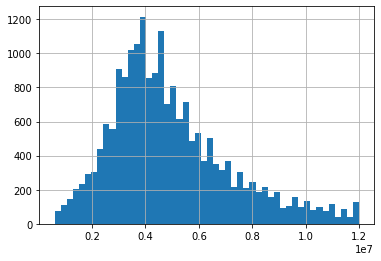

In [34]:
data['last_price'].hist(range=(600000, 12000000), bins=50)
data['last_price'].describe()

По стоимости - квартиры идут от 600 тыс до 124 млн. Наибольшее кол-во предложений в среднем по 4 млн руб.

count    21169.000000
mean         2.064434
std          0.998537
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          7.000000
Name: rooms, dtype: float64

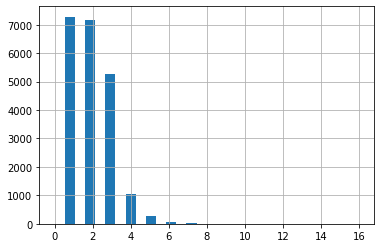

In [35]:
data['rooms'].hist(range=(0, 16), bins=30)
data['rooms'].describe()

По количеству комнат - квартиры идут от 1 до 7. Наибольшее кол-во предложений с 1-3 комнатами.

count    13374.000000
mean         2.719443
std          0.261544
min          2.400000
25%          2.510000
50%          2.650000
75%          2.800000
max          4.500000
Name: ceiling_height, dtype: float64

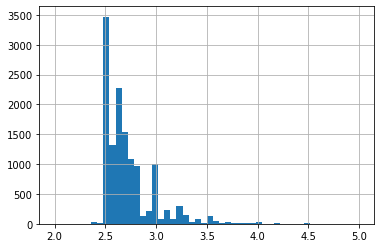

In [36]:
data['ceiling_height'].hist(range=(2, 5), bins=50)
data['ceiling_height'].describe()

По высоте потолков квартиры от 2.4 до 4.5 метров. Наибольшее кол-во предложений с потолком 2.5-2.7 метра.

count    21169.000000
mean         5.864188
std          4.829366
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

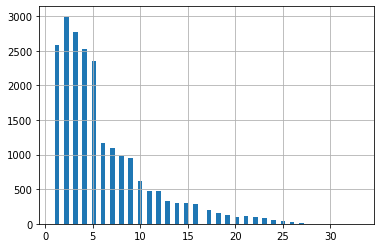

In [37]:
data['floor'].hist(range=(1, 33), bins=66)
data['floor'].describe()

Этажность от 1 до 33. Больше всего предложений с 1 по 5 этажи

другой       15602
последний     2989
первый        2578
Name: floor_type, dtype: int64

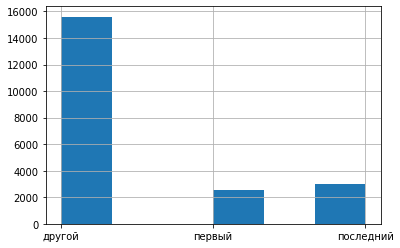

In [38]:
data['floor_type'].hist(bins=6)
data['floor_type'].value_counts()

Больше всего квартир на промежуточных этажах примерно 73%. Остальные примерно в вравных долях на 1 и на последнем

In [1]:
data['floors_total'].hist(range=(1, 35), bins=120)
data['floors_total'].describe()

NameError: name 'data' is not defined

В датасете присутсвуют дом от 2 до 35 этажей. Большая часть домов 5 и 9 этажки.

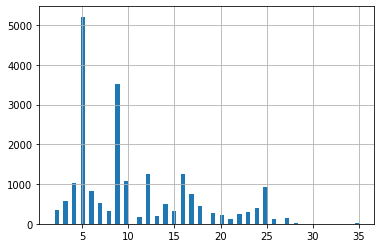

In [40]:
# check
data['floors_total'].hist( bins=70);

count    16423.000000
mean     14317.880107
std       8669.315689
min        181.000000
25%       9444.000000
50%      13147.000000
75%      16285.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

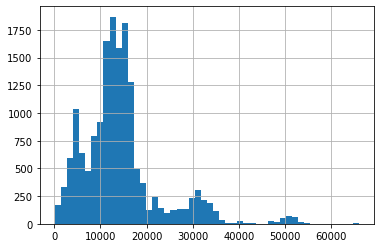

In [41]:
data['cityCenters_nearest'].hist(range=(150, 66000), bins=50)
data['cityCenters_nearest'].describe()

Дома расположены от 181 метра до почти 66 км от центра ближайшего города. У большинства домов расстояние в среднем примерно 14 км.

count    16404.000000
mean     28824.766520
std      12692.080538
min          0.000000
25%      18488.000000
50%      26791.000000
75%      37315.250000
max      84869.000000
Name: airports_nearest, dtype: float64

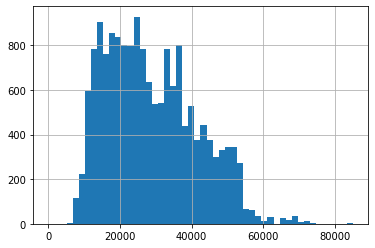

In [42]:
data['airports_nearest'].hist(range=(0, 85000), bins=50)
data['airports_nearest'].describe()

Большинство домов расположены в среднем на расстоянии от 18 до 27 км до ближайшего аэропорта. Но есть те кто расположен рядом и те кто в почти 85 км.

count    7269.000000
mean      488.261934
std       337.355248
min         1.000000
25%       288.000000
50%       452.000000
75%       611.000000
max      3190.000000
Name: parks_nearest, dtype: float64

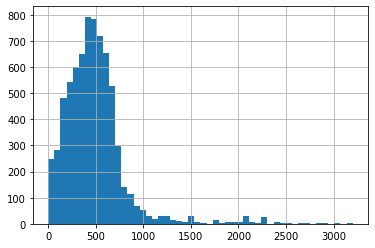

In [43]:
data['parks_nearest'].hist(range=(1, 3200), bins=50)
data['parks_nearest'].describe()

Дома(в которых указали этот параметр - их примерно 30% от общего числа) расположены от 1 до 3190 метров до ближ парка.
Большая часть из них от 287 до 610. В остальных предложениях скорее всего парка рядом нет.

3    3846
1    3784
4    3591
2    3525
0    3266
5    1687
6    1470
Name: day_start, dtype: int64


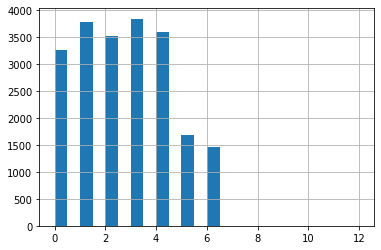

In [44]:
data['day_start'].hist(range=(0, 12), bins=24)
print(data['day_start'].value_counts())

2     2319
3     2296
11    2187
4     2161
10    1975
9     1832
6     1581
8     1566
7     1487
12    1325
1     1274
5     1166
Name: month_start, dtype: int64

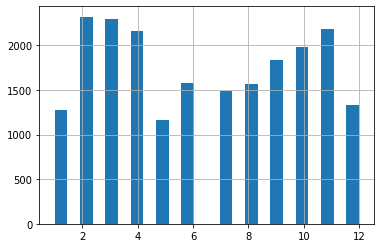

In [45]:
data['month_start'].hist(range=(1, 12), bins=24)
data['month_start'].value_counts()

По месяцам больше всего публикаций в феврале, марте, ноябре и апреле. Меньше всего в январе и мае. Видимо из-за больших праздников. По дням больше всего в четверг, но данные примерно равны во все дни кроме выходных - тут размещений значительно меньше: народ отдыхает:)

count    18248.000000
mean       179.769509
std        207.910760
min          3.000000
25%         44.000000
50%        100.000000
75%        235.000000
max       1200.000000
Name: days_exposition, dtype: float64

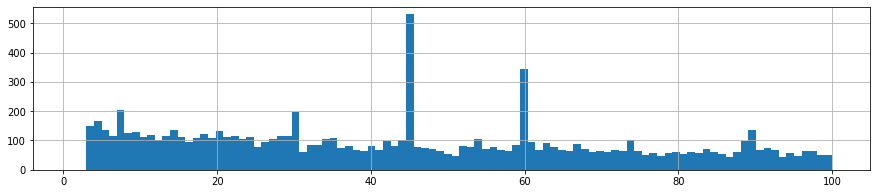

In [46]:
data['days_exposition'].hist(range=(1, 100), bins=100, figsize = (15,3))
data['days_exposition'].describe()

,days_exposition
year_start,
2014,808.597826
2015,603.001048
2016,321.023997
2017,159.924198
2018,97.713314
2019,31.203030


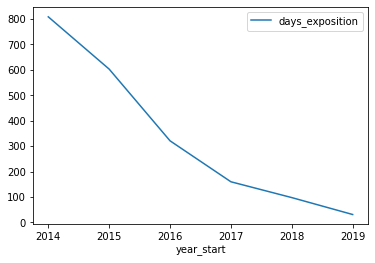

In [47]:
display(data.pivot_table(index='year_start', values='days_exposition', aggfunc='mean'))
data.pivot_table(index='year_start', values='days_exposition', aggfunc='mean').plot();

Среднее значение срока размещения составляет 185 дней. Медианное значение 102 дня. Большинство квартир продаются в срок до полугода. Быстрой можно считать продажу сделанную в теч 44 дней, а долгую более 239 дней. Есть и необычно долгие значинеия до 5 лет - видимо объект находится в глухом поселке или его состояние очень неликвидное или цена непомерно завышена. Есть и аномальное значание в 1-несколько дней. Возможно человек повесил объявление и потом передумал продавать -снял. Так же наблюдаются всплески в районе 45 и 60 дней. Это сявзано с истечением срока пуликации, установленного "Яндексом". C годами мы видим увеличение средней скорости продаж.

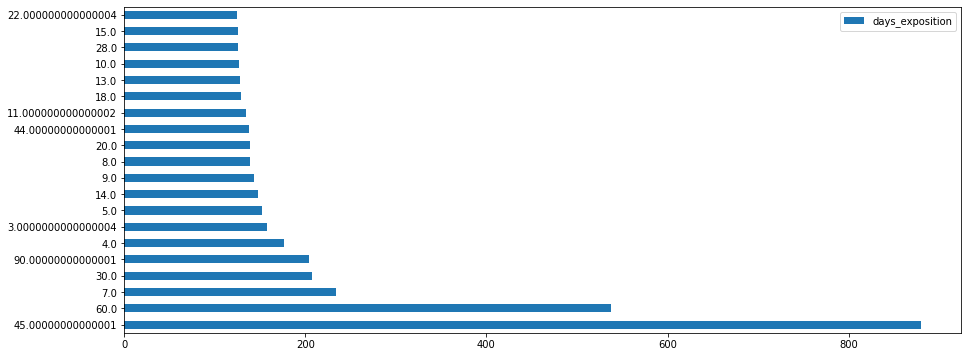

In [48]:
# check
# Моды на реальных данных
     
df_check['days_exposition'].value_counts().to_frame().head(20).plot(kind = 'barh', figsize = (15,6), rot = 0);

#### example 3

##### example 4

              day_start  kitchen_area  last_price  month_start     rooms  \
day_start      1.000000      0.011547   -0.145321     0.043452  0.052130   
kitchen_area   0.011547      1.000000    0.581435     0.000985  0.083665   
last_price    -0.145321      0.581435    1.000000    -0.049501  0.324264   
month_start    0.043452      0.000985   -0.049501     1.000000 -0.039678   
rooms          0.052130      0.083665    0.324264    -0.039678  1.000000   
total_area    -0.032360      0.527364    0.687987    -0.014147  0.778646   
year_start    -0.066255      0.001228   -0.076325    -0.322188 -0.052092   

              total_area  year_start  
day_start      -0.032360   -0.066255  
kitchen_area    0.527364    0.001228  
last_price      0.687987   -0.076325  
month_start    -0.014147   -0.322188  
rooms           0.778646   -0.052092  
total_area      1.000000   -0.043214  
year_start     -0.043214    1.000000  


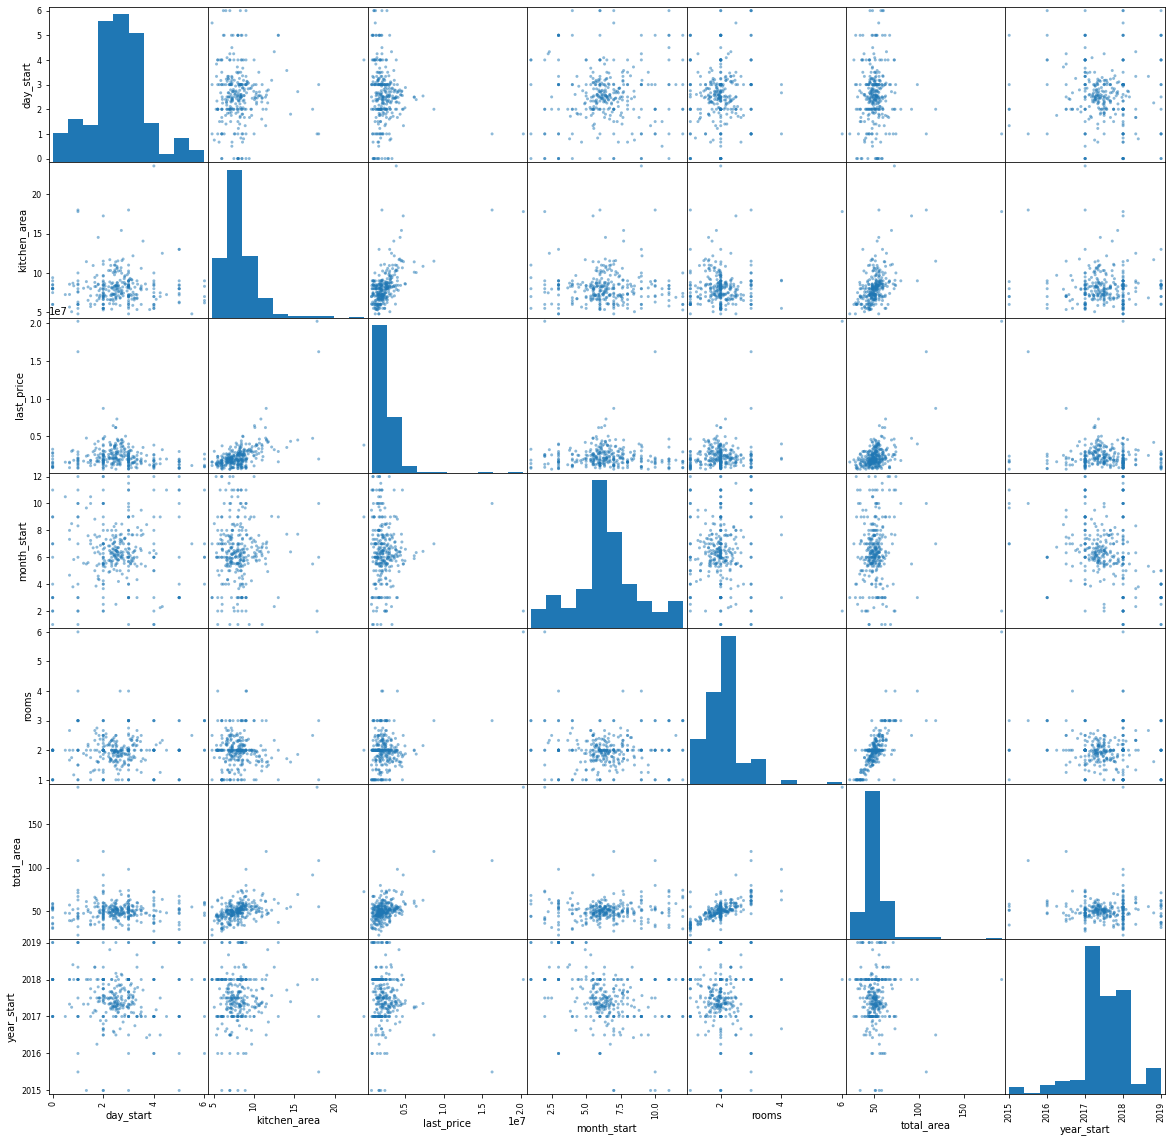

In [49]:
hwa = data.pivot_table(index='locality_name', values=['last_price', 'total_area', 'kitchen_area', 'rooms', 'floor_type', 'day_start', 'month_start', 'year_start'], aggfunc='mean')
print(hwa.corr()) 
pd.plotting.scatter_matrix(hwa, figsize=(20, 20));

In [50]:
hwa

,day_start,kitchen_area,last_price,month_start,rooms,total_area,year_start
locality_name,,,,,,,
Бокситогорск,3.111111,7.111111,8.510000e+05,5.666667,2.333333,50.244444,2017.888889
Волосово,2.941176,7.712059,1.955882e+06,6.411765,1.852941,48.872059,2017.264706
Волхов,2.434783,7.318462,1.736847e+06,6.195652,1.978261,49.458696,2017.586957
Всеволожск,2.458791,10.381014,3.823380e+06,6.541209,1.942308,56.264918,2017.343407
Выборг,2.827225,8.789681,3.301539e+06,5.753927,2.146597,56.677277,2017.361257
...,...,...,...,...,...,...,...
село Путилово,3.500000,7.850000,2.025000e+06,6.500000,2.000000,50.800000,2017.000000
село Рождествено,3.000000,8.150000,1.900000e+06,8.000000,1.666667,49.966667,2017.666667
село Русско-Высоцкое,3.500000,10.587500,2.743750e+06,7.625000,1.625000,50.050000,2017.125000


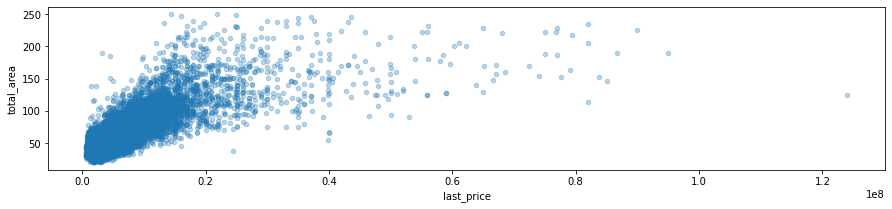

In [51]:
data.plot(x='last_price', y='total_area', kind = 'scatter', figsize = (15,3), alpha=0.3);

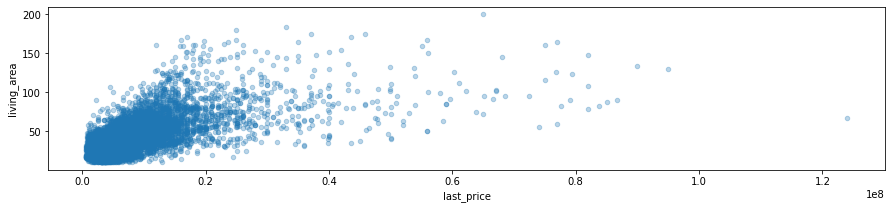

In [52]:
data.plot(x='last_price', y='living_area', kind = 'scatter', figsize = (15,3), alpha=0.3);

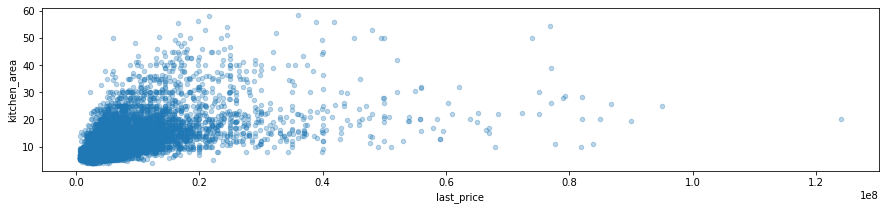

In [53]:
data.plot(x='last_price', y='kitchen_area', kind = 'scatter', figsize = (15,3), alpha=0.3);

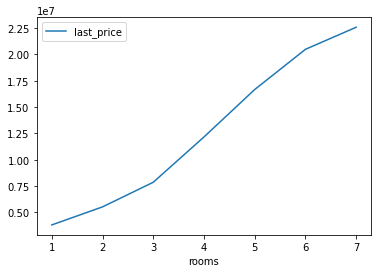

In [54]:
data.pivot_table(index='rooms', values='last_price', aggfunc='mean').plot();

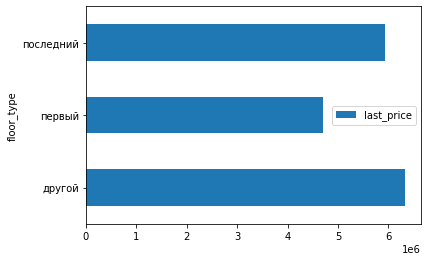

In [55]:
data.pivot_table(index='floor_type', values='last_price', aggfunc='mean').plot(kind='barh');

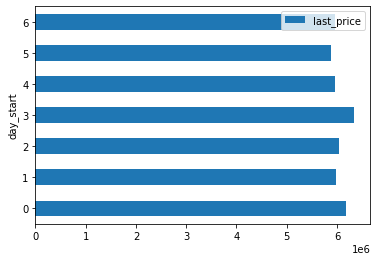

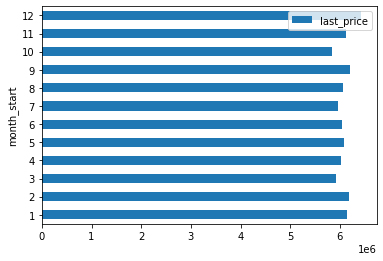

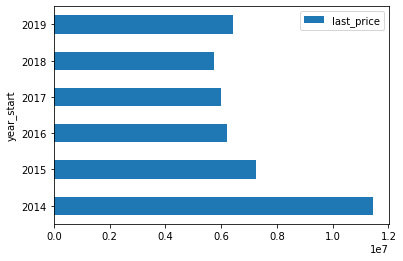

In [56]:
for i in ['day_start', 'month_start', 'year_start']:
    data.pivot_table(index=i, values='last_price', aggfunc='mean').plot(kind='barh');

Мы наблюдаем прямую зависмость цены от общей, жилой и кухонной площади, а так же от кол-ва комнат. По этажам - средняя цена более высокая на категорию 'другой'. Первые этажи предпочитают меньше, что отражается на цене. Цена не зависти от месяца и дня размещения. Мы наблюдаем тренд снижения средних с цен с 2014 по 2018 годы. Так же мы нблюдаем наибольшее кол-во объявлений в 207 и 2018 годах. В 2016 и 2019 в 3 раза меньше. В 2015 в 7 рвз меньше, а в 2014 всего 100 объявлений. И наблюдается тенденция к снижению средней площади квартир с годами.

In [57]:
data.pivot_table(index='year_start', values=['last_price', 'total_area'] , aggfunc=['mean', 'count'])

mean                 count           
              last_price total_area last_price total_area
year_start                                               
2014        1.144067e+07  83.181182        110        110
2015        7.244365e+06  66.876644       1016       1016
2016        6.211210e+06  60.530890       2607       2607
2017        5.982031e+06  59.006664       7448       7448
2018        5.749856e+06  56.992117       7351       7351
2019        6.416523e+06  57.772564       2637       2637

,mean,count
locality_name,,
Санкт-Петербург,112469.498443,14173
поселок Мурино,85611.596378,465
поселок Шушары,78470.323700,399
Всеволожск,68963.096376,364
Пушкин,103201.370514,336
Колпино,75249.775385,327
поселок Парголово,90491.190205,296
Гатчина,68627.363919,292
деревня Кудрово,92514.205391,246


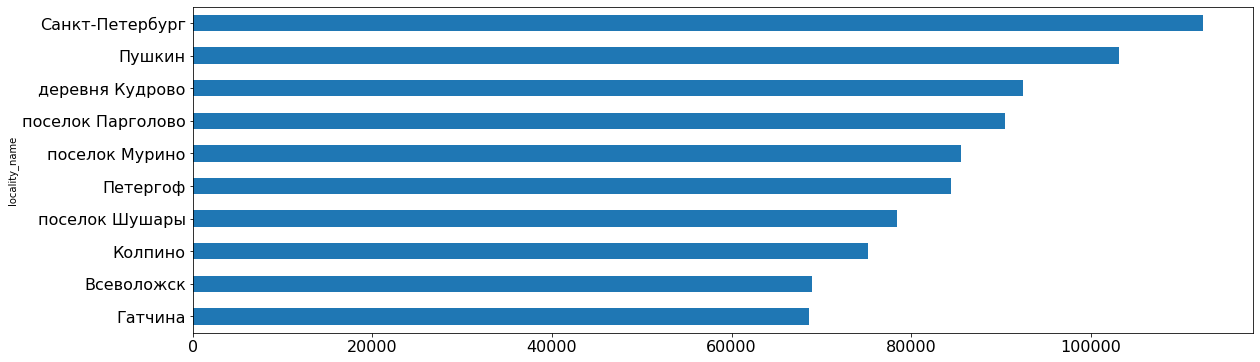

In [58]:
hws = data.pivot_table(index='locality_name', values=['meter_cost'], aggfunc=['mean', 'count'])
hws.columns = ['mean', 'count']
hwss = hws.sort_values(by='count', ascending=False).head(10)
display(hwss)
hwss['mean'].sort_values().plot(x='locality_name', y='mean', kind = 'barh', figsize = (19,6), legend = False, fontsize = 16);

Из топ 10 по объявлениям: самый дорогой кв. метр в Санкт-Петербурге и Пушкине. Самый дешевый в Гатчине

628238.0

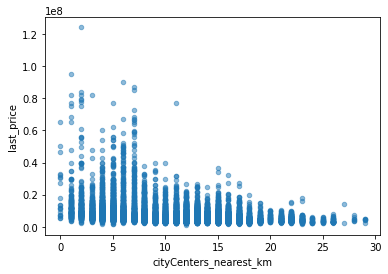

In [59]:
spb = data.query('locality_name == "Санкт-Петербург"').reset_index(drop=True)
spbx = (spb['last_price'].mean()/spb['cityCenters_nearest_km'].mean()).round()
spb.plot(x='cityCenters_nearest_km', y='last_price' , kind='scatter', alpha=0.5)
spbx

На диаграмме видно, что чем дальше от центра, тем меньше цена. Средняя цена киолметра составляет 685211 руб

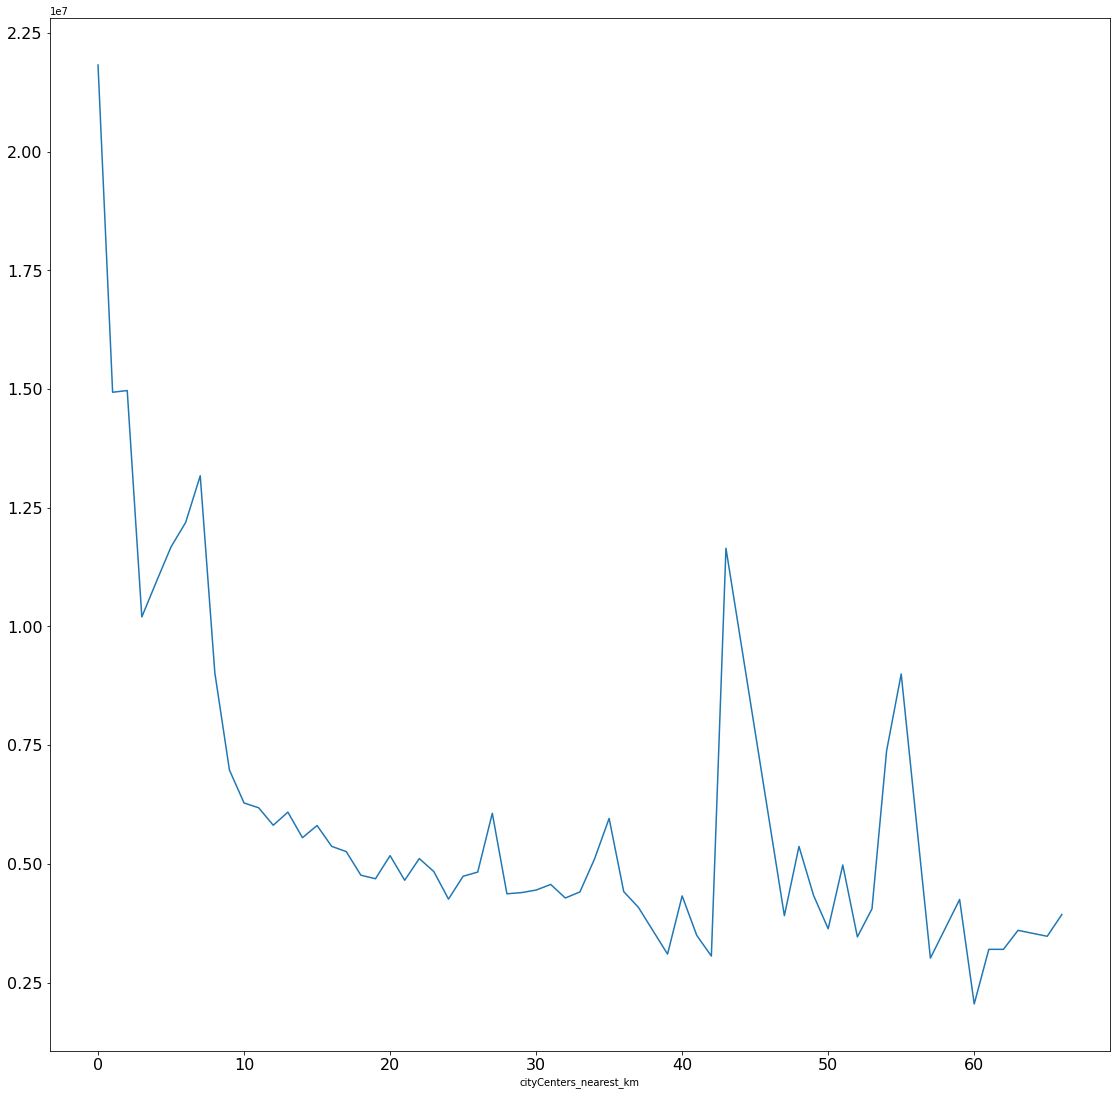

In [60]:
spb = data.dropna(subset=['cityCenters_nearest_km'])
spb.pivot_table(index='cityCenters_nearest_km', values='last_price', aggfunc='mean').plot(figsize = (19,19), legend = False, fontsize = 16);

Мы наблюдаем снижение стоимости квартир по мере удаления от центра. Но есть и вбросы с районе 45, 55 км и 7 км. от центра. На этих интервалах мы видим значительное снижение предложений в сравнении с соседними км., видимо из-за этого растет и цена.

In [61]:
spb.pivot_table(index='cityCenters_nearest_km', values='last_price', aggfunc=['mean', 'count'])

,mean,count
,last_price,last_price
cityCenters_nearest_km,,
0.0,2.182515e+07,20
1.0,1.493302e+07,162
2.0,1.496896e+07,274
3.0,1.020097e+07,314
4.0,1.094597e+07,618
5.0,1.167630e+07,788
6.0,1.218948e+07,507
7.0,1.317435e+07,376


In [62]:
spb3 = spb[(spb['cityCenters_nearest_km']==3)]
display(spb3.pivot_table(index='floor_type', values='last_price', aggfunc='count'))
spb5 = spb[(spb['cityCenters_nearest_km']==5)]
display(spb5.pivot_table(index='floor_type', values='last_price', aggfunc='count'))
print('на 3-км:', spb3['floor_type'].count(), 'шт', (spb3['floor_type'].count()/data['floor_type'].count()*100).round(2), '%')
print('на 5-км:', spb5['floor_type'].count(), 'шт', (spb5['floor_type'].count()/data['floor_type'].count()*100).round(2), '%')

,last_price
floor_type,
другой,190
первый,52
последний,72


,last_price
floor_type,
другой,598
первый,70
последний,120


на 3-км: 314 шт 1.48 %
на 5-км: 788 шт 3.72 %


In [63]:
# check
import seaborn as sns
import matplotlib.pyplot as plt

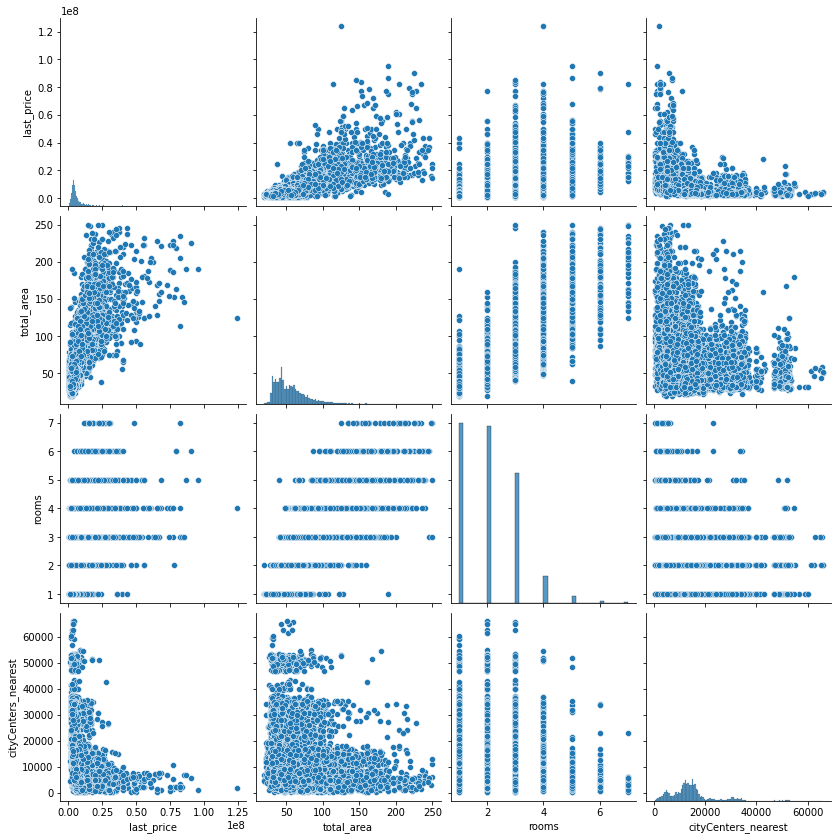

In [64]:
# check
sns.pairplot(data[['last_price', 'total_area', 'rooms', 'cityCenters_nearest']])
plt.gcf().set_size_inches(12,12);


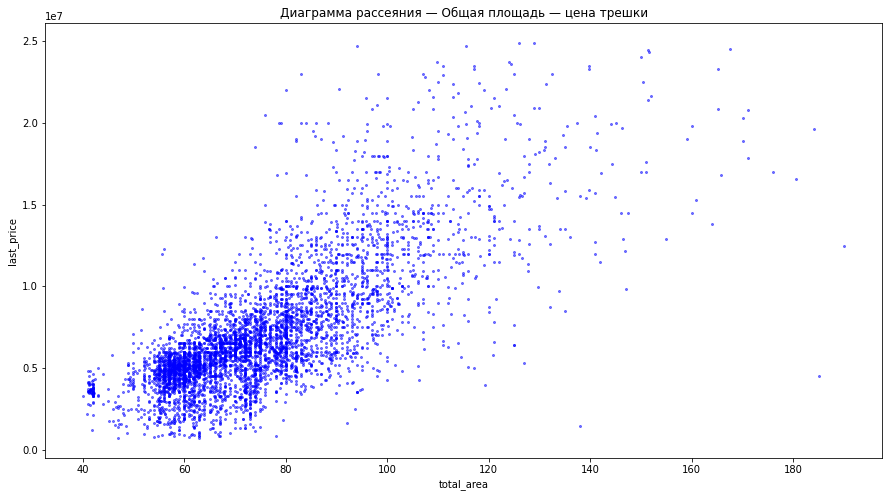

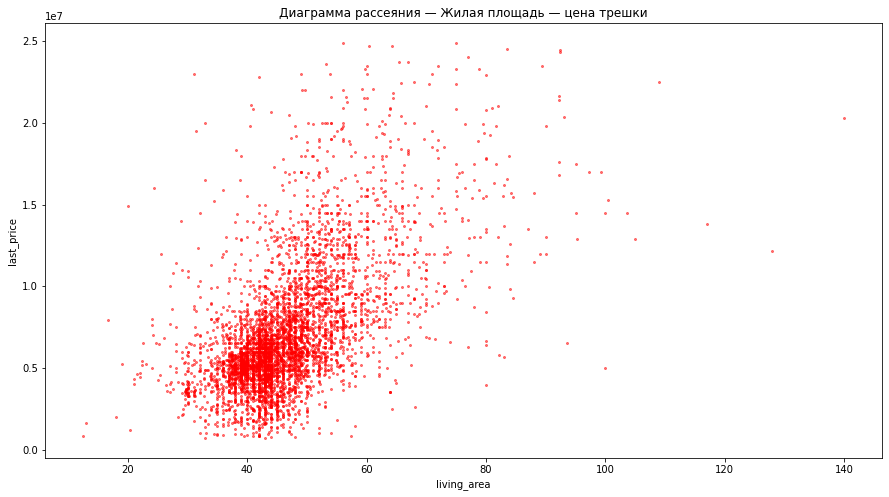

In [65]:
# check
data[data['rooms'] == 3].query('total_area < 201 and last_price < 25_000_000').plot(kind='scatter',
        y='last_price' , x='total_area', alpha=0.5, subplots=True, figsize=(15,8), c = 'b', s = 4)
plt.title('Диаграмма рассеяния — Общая площадь — цена трешки')


data[data['rooms'] == 3].query('total_area < 201 and last_price < 25_000_000').plot(kind='scatter', 
        y='last_price' , x='living_area', alpha=0.5, figsize=(15,8), c = 'r', s = 4)
plt.title('Диаграмма рассеяния — Жилая площадь — цена трешки');

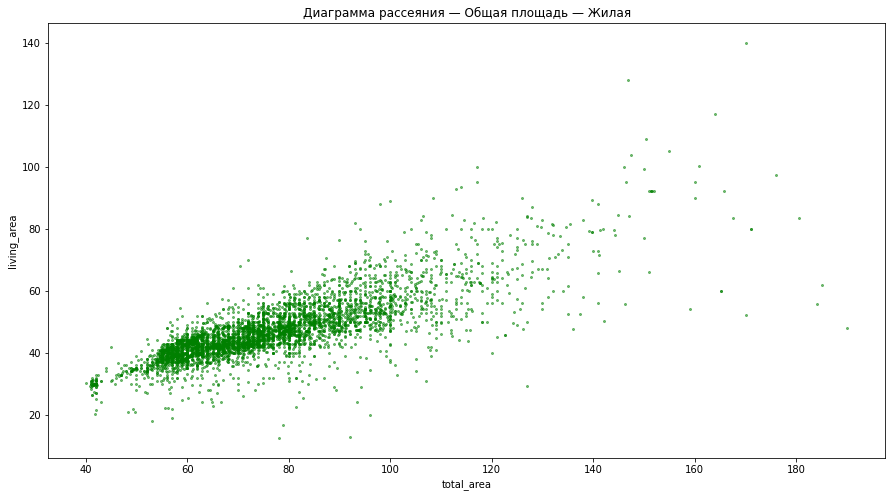

In [66]:
# check
data[data['rooms'] == 3].query('total_area < 201 and last_price < 25_000_000').plot(kind='scatter',
        y='living_area' , x='total_area', alpha=0.5, subplots=True, figsize=(15,8), c = 'g', s = 4)
plt.title('Диаграмма рассеяния — Общая площадь — Жилая');